## Machine Learning and Statistics Tasks
#### Hayley Doherty
---

### Task 1: Calculate the square root of 2 to 100 decimal places
---
In order to calculate the square root of 2 (or any number) will we use Newton's method. This algorithm produces successively better approximations of the root of a number [1]. To calculate the square root $z$ of a number $x$, we must start with guessing the square root and this guess will be adjusted with better guesses the more times we loop through the equation until we reach the guess as close to the square root as possible based on how close $z^2$ is to $x$ [2].
$$ z = z - \frac{z^2 - x}{2z} $$




In [1]:
# code used to obtain the square root of 2
def sqrt2():
    z = 2/2
    while abs(2-(z * z)) > 0.000001:
        z-= (z * z - 2)/ (2 * z)
    return z

In [2]:
# calling the function to check it works
sqrt2()

1.4142135623746899

In [3]:
# Testing my answer against known value
import math
math.sqrt(2)

1.4142135623730951

Below I have formatted the value that is returned by the function so that the answer is displayed to 100 decimal places. This is achieved using '.100f'. The format specification 'f' is used with floating point and decimal numbers to display the number as a fixed-point number [3]. The default precision is 6 however you can specify the number of decimal places you want to return by inserting that number infront of the specifier, 'f'. To return the answer to 100 decimal places I added 100 infront of 'f' as shown below.

In [4]:
# added formatting to return the answer to 100 decimal places
def sqrt2():
    z = 2/2
    while abs(2-(z * z)) > 0.000001:
        z-= (z * z - 2)/ (2 * z)
    return format(z, '.100f')

In [5]:
sqrt2()

'1.4142135623746898698271934335934929549694061279296875000000000000000000000000000000000000000000000000'

<br>

---

### Task 2: Chi-Square
___
A chi-square test, also known as Pearson's chi-squared test, is used to determine if there is a difference between the expected values and those actually observed. The null hypothesis states that there is no difference between the expected and observed values and if this is true then the test statistic calculated from these values will be chi-squared distributed [4]. This is the distribution of a sum of the squares of *k* independent standard normal random variables [5]. The value  produced by the chi-square test is called the chi-square statistic. A small value means that there is a high correlation between the expected and observed data, i.e. there is no difference between them. The eqution for calculating the chi-square statistic is shown below.
$$X^2=\sum{\frac{(Oi - Ei)^{2}}{Ei}}$$

$O$= Observed value(s)

$E$= Expected value(s)

The most common way of calculating the chi-square ststistic is by making a table, called a contingency table, used to summarize the frequency distribution between variables [6]. The function chi2_contingency from SciPy.stats. returns a contingency table containing the expected values based on the data we observed.

In [9]:
import numpy as np
from scipy.stats import chi2_contingency

#converted the data into a NumPy array 

white = [90, 60, 104, 95]
blue = [30, 50, 51, 20]
no = [30, 40, 45, 35]

collar = np.array([white, blue, no])

In [2]:
# passed the array into the chi-square function
chi2_contingency(collar)

(24.5712028585826,
 0.0004098425861096696,
 6,
 array([[ 80.53846154,  80.53846154, 107.38461538,  80.53846154],
        [ 34.84615385,  34.84615385,  46.46153846,  34.84615385],
        [ 34.61538462,  34.61538462,  46.15384615,  34.61538462]]))

Above we can see the output from the chi-square function, however it can be hard to understand what the output means and so I have used the code and print statements below, adapted from [6], to return the output in a neater and easier to understand fashion.

In [5]:
chi_stat, p_val, dof, table = chi2_contingency(collar)
print("Chi Stat")
print(chi_stat)
print("\n")
print("Degrees of Freedom")
print(dof)
print("\n")
print("P-Value")
print(p_val)
print("\n")
print("Contingency Table")
print(table)

Chi Stat
24.5712028585826


Degrees of Freedom
6


P-Value
0.0004098425861096696


Contingency Table
[[ 80.53846154  80.53846154 107.38461538  80.53846154]
 [ 34.84615385  34.84615385  46.46153846  34.84615385]
 [ 34.61538462  34.61538462  46.15384615  34.61538462]]


The chi-square value obtained, 24.5712028585826, matches that presented in the task instructions. The p-value obtained, *p*=0.0004098425861096696, is less than 0.001, indicating a high level of statistical significance. The significance level allows us to conclude that there is a difference bewteen the three groups, however as there are more than two groups, further analysis would have to be performed to reveal exactly which of the groups differed from each other.

___

### Task 3: Comparison of standard deviation functions

___
The standard deviation (SD) of a set of numbers is the measure of the amount of variation between the  numbers in the set. A low SD suggests that the numbers in the set are close to the mean while a high SD would indicate that the values are spread over a wide range [7]. 

It is often not possible to study whole populations and so a sample from the population of interest is often investigated. It is important that the sample well represents the population from which it is drawn and that the selection of the sample is random. By ensuring that the sample is chosen randomly we prevent biased measurements and can conclude that the average of the sample is close to the true population mean [10].

The population SD is a parameter which is a fixed value whereas the sample SD is a statistic calculated from a portion of the population and so contains variability. The formulae for calculating both SDs are very similar as can be seen below, with the only difference being that in the sample SD you must divide by $n$-1 rather than dividing by $n$ as in the population SD [11].

There are two formulas that can be used to calculate the SD of a data set, sample and population SD. The formula to use depends on what your data set represents. If your data set consists of the entire population or if you are not generalizing you sample data set to a larger population then you wuld calculate the population SD; however if your data set consists of a sample from a larger population to which you will generalize your findings the sample SD should be used [8].

The Excel population SD function, written STDEV.P, calculates the SD based on the entire population given as arguments. It is calculated using the 'n' method [9]:

$$\sigma=\sqrt{\frac{\sum(x-\overline{x})^2}{n}}$$

$\sigma$= population standard deviation<br>
$\sum$= sum of...<br>
$\overline{x}$= population mean<br>
$n$= population size<br>

The Excel sample SD function, written STDEV.S, calculates the SD based on the a proportion of the population, i.e. a sample. The formula used by Excel to calculate STDEV.S is:

$$\sigma=\sqrt{\frac{\sum(x-\overline{x})^2}{n-1}}$$
$\sigma$= sample standard deviation<br>
$\sum$= sum of...<br>
$\overline{x}$= sample mean<br>
$n$= sample size<br>

The NumPy formula for calculating the SD is the same as the excel version for calculating the population SD. Therefore if you were to use this on a sample data set the SD obtained would not be accurate. 

In [6]:
a = [2, 3, 2, 3, 1, 3, 2, 1, 3, 2, 4, 2, 4, 3, 1]
np.std(a) # performs population SD

0.9521904571390466

When the SD is calculated in Excel using STDEV.S, the output is 0.9856107606. As the Excel formula takes into account the fact that the array input into the formula is a sample it would suggests that this calculation is more accurate comapred to the NumPy formula. However you can set a parameter in the NumPy.std function that enables you to calculate the sample SD, called delta degrees of freedon (ddof), which you set to 1, altering the formula to the same formula used by Excel STDEV.S [12].

In [7]:
np.std(a, ddof=1) # sample SD

0.9856107606091623

---

### Task 4: $k$-means Clustering
---
The purpose of this task is to apply $k$-means clustering to Fischer's Iris data set. $K$-means clustering is a method of vector quantization that groups observations into a number of clusters in which each observation belongs to the cluster with the nearest mean or centroid. 

In [1]:
# import libraries required for the task
import sklearn.cluster as skcl
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# read the data set in as a data frame using pandas
df = pd.read_csv('irisdata.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
# locating the values needed to pass into the k-means algoithm
x = df.iloc[:, [0, 1, 2, 3]].values

In [5]:
# running the algorithm, must insert number of clusters as a parameter into
# the algorithm, here it is known we have 3, one for each species
# if number of clusters is unknown, can be dfound using the elbow method
kmeans = skcl.KMeans(n_clusters=3, random_state=0).fit(x)

The results below are the 3 clusters into which the $k$-means algorithm has grouped the data set. These clusters correspond to the 3 species of Iris, with 0= Iris-Versicolor, 1= Iris-Setosa and 2= Iris-Virginica. As seen by looking at the results, it seems that a majority of the data points have been classified into the correct cluster however there are some errors. As we know the correct classification of the data set we can work out how accurate the $k$-means clustering is.

In [6]:
# the labels attribute labels each point with the cluster is has been assigned to
results=(kmeans.labels_)
results

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

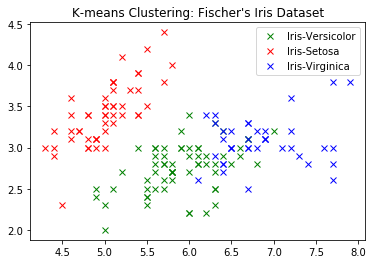

In [11]:
plt.plot(x[kmeans.labels_ == 0][:,0], x[kmeans.labels_ == 0][:,1], 'gx', label="Iris-Versicolor")
plt.plot(x[kmeans.labels_ == 1][:,0], x[kmeans.labels_ == 1][:,1], 'rx', label="Iris-Setosa")
plt.plot(x[kmeans.labels_ == 2][:,0], x[kmeans.labels_ == 2][:,1], 'bx', label="Iris-Virginica")
plt.title("K-means Clustering: Fischer's Iris Dataset")
plt.legend()
plt.show()

In [12]:
# as there are 50 points in each cluster I split the results into the separate clusters a, b and c
[a, b, c]=np.split(results, 3)

The a group which correspond to the Setosa species should all be labelled 1 and so when added should total 50, which it does meaning that this group have been clustered correctly.

In [13]:
# adding the first cluster
np.sum(a)

50

The second cluster (b) should be labelled all 0's as these are from the Versicolor species but when added together the total comes to 4 and we can see that 2 of the points have been mislabelled as Virginicas.

In [14]:
# adding the second cluster
np.sum(b)

4

The third cluster should all be labelled 2 as they are from the Virginica so when the cluster is added the total should be 100 but is comes to 72 making a difference of 28. We can see that a number of the points have been labelled as 0 instead of 2 meaning that 14 points have been classified wrongly.

In [15]:
# adding the third cluster
np.sum(c)

72

As a total of 16 points have been clustered into the wrong group, we can say that the chance of this occuring is 10.6667%. 

Below is a method that can be used to predict the species of Iris based on values given that are not part of the data set used previously. The kmeans model generated with the Iris set data is used to make these predictions, adding the test values to the cluster which it most resembles. The first was added to the Versicolor cluster (0) and the second to the Virginica cluster(2).

In [22]:
# made-up 2 values to use with the .predict attribute which will predict which cluster they fall into
testPoints = np.array([[5.3, 2.8, 4.8, 1.0], [6.8, 2.5, 5.2, 1.8]])
predictions = kmeans.predict(testPoints)
predictions

array([0, 2])

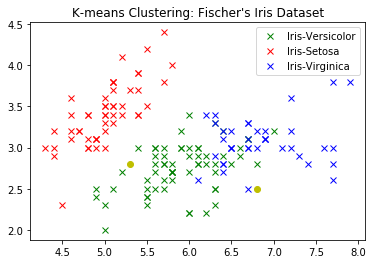

In [23]:
# plotting each cluster as well as the 2 predictions (yellow dots)
plt.plot(x[kmeans.labels_ == 0][:,0], x[kmeans.labels_ == 0][:,1], 'gx', label="Iris-Versicolor")
plt.plot(x[kmeans.labels_ == 1][:,0], x[kmeans.labels_ == 1][:,1], 'rx', label="Iris-Setosa")
plt.plot(x[kmeans.labels_ == 2][:,0], x[kmeans.labels_ == 2][:,1], 'bx', label="Iris-Virginica")
plt.plot(testvals[:,0], testPoints[:,1], 'yo')
plt.title("K-means Clustering: Fischer's Iris Dataset")
plt.legend()
plt.show()

In [18]:
# calculating the centre of each cluster (sometimes called centroid)
centre = kmeans.cluster_centers_
centre

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

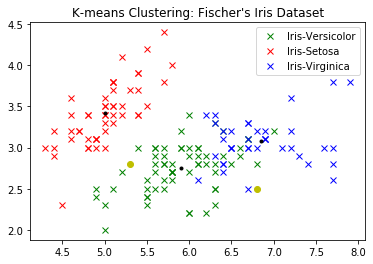

In [21]:
# plot of each cluster including its centroid and the 2 predictions
plt.plot(x[kmeans.labels_ == 0][:,0], x[kmeans.labels_ == 0][:,1], 'gx', label="Iris-Versicolor")
plt.plot(x[kmeans.labels_ == 1][:,0], x[kmeans.labels_ == 1][:,1], 'rx', label="Iris-Setosa")
plt.plot(x[kmeans.labels_ == 2][:,0], x[kmeans.labels_ == 2][:,1], 'bx', label="Iris-Virginica")
plt.plot(testvals[:,0], testvals[:,1], 'yo')
plt.plot(centre[:,0], centre[:,1], 'k.')
plt.title("K-means Clustering: Fischer's Iris Dataset")
plt.legend()
plt.show()

[1]. Newton's method; https://en.wikipedia.org/wiki/Newton%27s_method

[2]. A Tour of Go; Exercise: Loops and Functions; https://tour.golang.com/flowcontrol/8

[3]. Format Specifications; The Python Standard Library; https://docs.python.org/3/library/string.html#format-string-syntax

[4]. Chi-squared test; https://en.wikipedia.org/wiki/Chi-squared_test

[5]. Chi-square distribution; https://en.wikipedia.org/wiki/Chi-square_distribution

[6]. Running Chi-Square Tests with Die Roll Data in Python, Jake Huneycutt; https://towardsdatascience.com/running-chi-square-tests-in-python-with-die-roll-data-b9903817c51b

[7]. Standard Deviation; https://en.wikipedia.org/wiki/Standard_deviation

[8]. Standard Deviation; https://statistics.laerd.com/statistical-guides/measures-of-spread-standard-deviation.php

[9]. STDEV.P funcion; https://support.microsoft.com/en-us/office/stdev-p-function-6e917c05-31a0-496f-ade7-4f4e7462f285#:~:text=P%20function,-Excel%20for%20Microsoft&text=Calculates%20standard%20deviation%20based%20on,average%20value%20(the%20mean).

[10]. Populations and Samples; https://www.bmj.com/about-bmj/resources-readers/publications/statistics-square-one/3-populations-and-samples

[11]. Differences between Population and Sample Standard Deviations; https://www.thoughtco.com/population-vs-sample-standard-deviations-3126372#:~:text=The%20population%20standard%20deviation%20is,the%20individuals%20in%20a%20population.

[12]. numpy.std, NumPy v1.19 Manual; https://numpy.org/doc/stable/reference/generated/numpy.std.html#numpy.std